# ЛИНЕЙНАЯ АЛГЕБРА: СХОДСТВО ТЕКСТОВ И АППРОКСИМАЦИЯ ФУНКЦИЙ
## Цели: 
- Cчитать текст из файла с помощью Python и разбить его на слова
- Перевести текст в векторное пространство, вычислить расстояния в этих пространствах
- Решить систему линейных уравнений
- Приблизить  функцию с помощью многочленов



## Задание 1: сравнение предложений
>Дан набор предложений, скопированных с Википедии. Набор находится в файле «sentences.txt». Каждое из них имеет "кошачью тему" 
в одном из трех смыслов:
>- кошки (животные)
>- UNIX-утилита cat для вывода содержимого файлов
>- версии операционной системы OS X, названные в честь семейства кошачьих 
>
>Ваша задача — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры 
близости по смыслу мы будем использовать косинусное расстояние.

## Выполнение:
#### Используемые библиотеки :
   - **numpy** для работы с матрицой, 
   - **re** для работы с регулярными выражениями, 
   - **scipy** для вычисления косинусного расстояния.

#### Используемые функции:
   - **open** открытие файла для чтения, записи,
   - **readlines** для построчного считывания, 
   - **write** для записи в файл,
   - **split** разбитие строки на элементы под определенный шаблон, возвращат список из этих элементов,
   - **lower** приведение к нижнему регистру, 
   - **write** для записи в файл,
   - **append** добавление элемента в список,
   - **zeros** создание нулевой матрицы определенного размера,
   - **len** размер списка/словаря, 
   - **cosine** вычисление косинусного расстояния.

#### Шаги выполнения:
1. Создание и открытие файлов
2. Построчное считывание с файла
3. Приведение строк к нижнему регистру, посредством их перебора и их запись в отдельный файл
4. Перебор строк, их разбиение на элементы, проверка элемента на пустое значение, добавление не пустых значенние в отдельный список
5. Избавление от повторяющихся элементов в списке
6. Сопоставление каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях
7. Создание матрицы с нулевыми значениями
8. Заполнение матрицы элементов, с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. 
9. Нахождение косинусного расстояния
10. Запись в файл номера двух итоговых предложений

## Код:

In [25]:
import numpy
import re
from scipy.spatial.distance import cosine

In [2]:
sentences=open('C:\\Users\\Sofya_Chirkova\\Desktop\\sentences.txt','r+')
senten = open('C:\\Users\\Sofya_Chirkova\\Desktop\\sentences_lower.txt', 'w')

In [3]:
lines= sentences.readlines()

In [4]:
for line in lines :
    senten.write(line.lower())
senten.close()    

In [5]:
senten = open('C:\\Users\\Sofya_Chirkova\\Desktop\\sentences_lower.txt', 'r')
senten_lines= senten.readlines()

In [6]:
list_2=[]
list_3=[]
all_s=[]
for line in senten_lines:
    list=re.split('[^a-z]',line)
    list_2=[x for x in list if x]
    list_3.append(list_2)
    all_s=all_s+list_2
print(list_3)
len(list_3)

[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes'], ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output'], ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals'], ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'], ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organism

22

In [7]:
set_all=[]
for a in all_s :
    if a not in set_all:
        set_all.append(a)

In [8]:
dict_words={}
d=0
for a in set_all:
    if a not in dict_words:
        dict_words[d]=a
        d+=1
print(dict_words)

{0: 'in', 1: 'comparison', 2: 'to', 3: 'dogs', 4: 'cats', 5: 'have', 6: 'not', 7: 'undergone', 8: 'major', 9: 'changes', 10: 'during', 11: 'the', 12: 'domestication', 13: 'process', 14: 'as', 15: 'cat', 16: 'simply', 17: 'catenates', 18: 'streams', 19: 'of', 20: 'bytes', 21: 'it', 22: 'can', 23: 'be', 24: 'also', 25: 'used', 26: 'concatenate', 27: 'binary', 28: 'files', 29: 'where', 30: 'will', 31: 'just', 32: 'sequence', 33: 'a', 34: 'common', 35: 'interactive', 36: 'use', 37: 'for', 38: 'single', 39: 'file', 40: 'is', 41: 'output', 42: 'content', 43: 'standard', 44: 'hear', 45: 'sounds', 46: 'too', 47: 'faint', 48: 'or', 49: 'high', 50: 'frequency', 51: 'human', 52: 'ears', 53: 'such', 54: 'those', 55: 'made', 56: 'by', 57: 'mice', 58: 'and', 59: 'other', 60: 'small', 61: 'animals', 62: 'one', 63: 'people', 64: 'deliberately', 65: 'tamed', 66: 'artificial', 67: 'selection', 68: 'they', 69: 'were', 70: 'useful', 71: 'predators', 72: 'vermin', 73: 'domesticated', 74: 'its', 75: 'closes

In [9]:
a = numpy.zeros(shape=(len(list_3),len(dict_words)))

In [10]:
k=0
for i in range(0,len(list_3)):
    for j in range(0,len(dict_words)):
        for g in list_3[i]:
            if dict_words[j]==g:
                k+=1
            a[i][j]=k
        k=0  

In [11]:
print(a)

[[1. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 2. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 1.]]


In [12]:
print(list_3)

[['in', 'comparison', 'to', 'dogs', 'cats', 'have', 'not', 'undergone', 'major', 'changes', 'during', 'the', 'domestication', 'process'], ['as', 'cat', 'simply', 'catenates', 'streams', 'of', 'bytes', 'it', 'can', 'be', 'also', 'used', 'to', 'concatenate', 'binary', 'files', 'where', 'it', 'will', 'just', 'concatenate', 'sequence', 'of', 'bytes'], ['a', 'common', 'interactive', 'use', 'of', 'cat', 'for', 'a', 'single', 'file', 'is', 'to', 'output', 'the', 'content', 'of', 'a', 'file', 'to', 'standard', 'output'], ['cats', 'can', 'hear', 'sounds', 'too', 'faint', 'or', 'too', 'high', 'in', 'frequency', 'for', 'human', 'ears', 'such', 'as', 'those', 'made', 'by', 'mice', 'and', 'other', 'small', 'animals'], ['in', 'one', 'people', 'deliberately', 'tamed', 'cats', 'in', 'a', 'process', 'of', 'artificial', 'selection', 'as', 'they', 'were', 'useful', 'predators', 'of', 'vermin'], ['the', 'domesticated', 'cat', 'and', 'its', 'closest', 'wild', 'ancestor', 'are', 'both', 'diploid', 'organism

In [23]:
senten_finish = open('C:\\Users\\Sofya_Chirkova\\Desktop\\senten_finish', 'w')
list_dis=[]
list_sort=[]
for row in range(1,len(a)):
    x=cosine(a[0],a[row])
    list_dis.append(x)
list_dis.sort()
for row in range(1,len(a)):
    x=cosine(a[0],a[row])
    if x==list_dis[0] or x==list_dis[1]:
        senten_finish.write(str(row)+" ")         
senten_finish.close()

## Задание 2: аппроксимация функции
>Рассмотрим сложную математическую функцию на отрезке [1,15]:
>
> *f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)*
> 
>Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.
>
>Как известно, многочлен степени n (то есть w_0 + w_1 x + w_2 x^2 + ... + w_n x^n) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты w_0, ... w_n можно определить из следующей системы линейных уравнений: 
>где через x_1, ..., x_n, x_{n+1} обозначены точки, через которые проходит многочлен, а через f(x_1), ..., f(x_n), f(x_{n+1}) — значения, которые он должен принимать в этих точках.
Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.


## Выполнение:
#### Используемые библиотеки :
   - **numpy** для работы с матрицой и, для решения системы уравнений
   - **matplotlib** постраение графиков

#### Используемые функции:
   - **f** возвращает значение заданной функции в заданной точки x, которая передается в параметрах
   - **zeros** задание нулевой матрицы заданного размера
   - **solve** решение системного уравнения, в параметрах передается матрица коэффициентов A и свободный вектор b
   - **plot** построение  графика переданной функции в качестве параметра на определеном интервале x
   - **set_.label** задание названий осям
   - **write** для записи в файл
  
#### Шаги выполнения:
1. Создание функции f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)
2. Задание списка из значений x
3. Создание свободного вектора, с незаполнеными элементами, количество строчек которого равно размеру ранее созданого списка
4. Заполнение свободного вектора,знчениями равными результату функции от передоваемого значения x
5. Создание квадратной матрицы коэффициентов А, с незаполнеными элементами, количество строчек и столбцов которого равно размеру ранее созданого списка
6. Заполнение матрицы А
7. Решение системы уравнения
8. Создание функции, которой возвращает многочлен
9. Построение графика
10. Запись коэффициентов многочлена в файл

## Код:

In [1]:
import numpy as np
from numpy import linalg as la
from matplotlib import pylab as plt

In [2]:
def f(x):
    return np.sin(x/5)*np.exp(x/10)+5*np.exp(-x/2)

In [225]:
points=[1,4,10,15]

In [226]:
b = np.zeros(shape=(len(points),1))

In [239]:
j=0
i=0
for p in points:
    b[i][j]=f(p)
    i=i+1
print(b)

[[3.25221687]
 [1.74684595]
 [2.50541641]
 [0.63522142]]


In [228]:
a = np.zeros(shape=(len(points),len(points)))

In [229]:
for i in range (0,len(points)):
    for j in range (0,len(points)): 
        a[i][j]=points[i]**j

In [240]:
print(a)

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03]
 [1.000e+00 1.500e+01 2.250e+02 3.375e+03]]


In [114]:
w=la.solve(a,b)

In [223]:
w_1=la.solve(a,b)

In [238]:
w_2=la.solve(a,b)

[[ 4.36264154]
 [-1.29552587]
 [ 0.19333685]
 [-0.00823565]]


In [215]:
def f1(x,r):
    y=r[0]
    for n in range(1,len(r)):
        y=y+r[n]*x**n
    return y

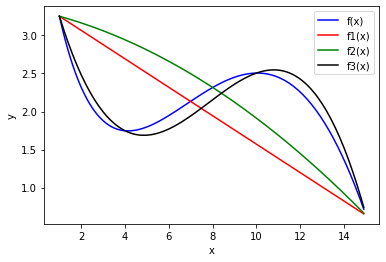

In [233]:
_, ax = plt.subplots()
x = np.arange(1, 15, 0.1)
ax.plot(x, f(x), color="blue", label= "f(x)")
ax.plot(x,f1(x,w), color="red", label= "f1(x)")
ax.plot(x,f1(x,w_1), color="green", label= "f2(x)")
ax.plot(x,f1(x,w_2), color="black", label= "f3(x)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()

In [251]:
aproximation = open('C:\\Users\\Sofya_Chirkova\\Desktop\\aproximation.txt', 'w')
for apr in w_2:
    for f in apr:
        aproximation.write(str(f)+ " ")
aproximation.close()